In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pwlf as pwlf
%matplotlib inline

path = r'D:\DATA\Epex\french_aggregated_bids'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


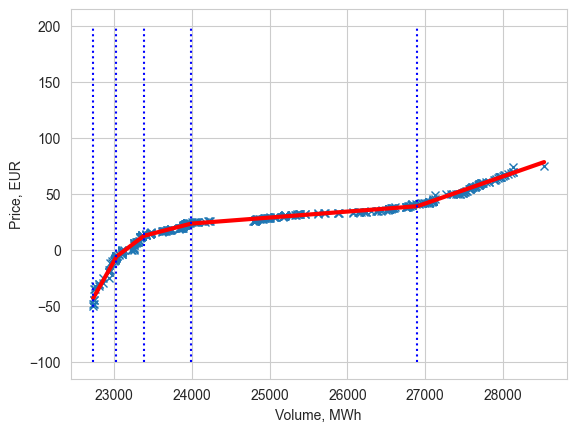

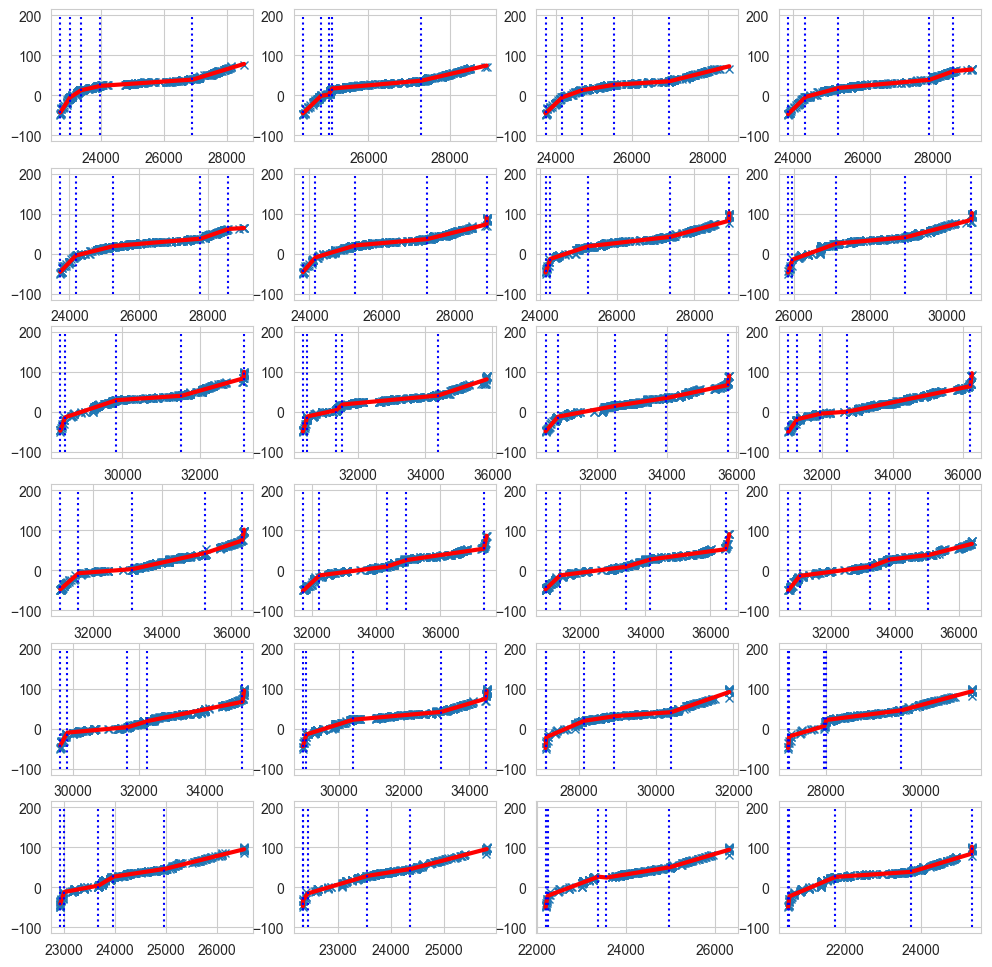

In [4]:
##### Allemagne

hour = 1
ac = pd.read_csv(r'D:\DATA\Epex\Auction_sample\auction_sample.csv')
res = []
nint = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
#plt.figure(figsize=(12,12))
#for i in range(24):
#    print(i
ach = ac[ac['Hour']==hour]
acs=ach[(ach['Sale/Purchase']=='Sell')&(ach['Price']<100)&(ach['Price']>-50)]
    # initialize piecewise linear fit with your x and y data
x = acs['Volume']
y = acs['Price']
my_pwlf = pwlf.PiecewiseLinFit(x, y)
    # fit the data for four line segments
res = my_pwlf.fit(5)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
    # plot the results
plt.plot(x, y, 'x')
plt.plot(xHat, yHat, 'r-',linewidth=3)
for j in range(5):
    plt.plot([res[j],res[j]],[-100,200],':b')
plt.xlabel('Volume, MWh')
plt.ylabel('Price, EUR')
plt.savefig('agrecurve.pdf',format='pdf')


ac = pd.read_csv(r'D:\DATA\Epex\Auction_sample\auction_sample.csv')
res = []
nint = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
plt.figure(figsize=(12,12))
for i in range(24):
    print(i)
    ach = ac[ac['Hour']==i+1]
    acs=ach[(ach['Sale/Purchase']=='Sell')&(ach['Price']<100)&(ach['Price']>-50)]
    # initialize piecewise linear fit with your x and y data
    x = acs['Volume']
    y = acs['Price']
    my_pwlf = pwlf.PiecewiseLinFit(x, y)
    # fit the data for four line segments
    res.append(my_pwlf.fit(nint[i]))
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)
    # plot the results
    plt.subplot(6,4,i+1)
    plt.plot(x, y, 'x')
    plt.plot(xHat, yHat, 'r-',linewidth=3)
    for j in range(5):
        plt.plot([res[i][j],res[i][j]],[-100,200],':b')
#acs2=ach[(ach['Sale/Purchase']=='Sell')&(ach['Volume']>res[2])&(ach['Volume']<res[3])]

#plt.plot(acs2['Volume'],acs2['Price'],'d')


In [ ]:
date = '20160101'
ac = pd.read_excel(path + r'\auction_aggregated_curves_france_'+date+'.xlsx',skiprows=1)

res = []
nint = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
plt.figure(figsize=(12,12))
for i in range(24):
    print(i)
    ach = ac[ac['Hour']==i+1]
    acs=ach[(ach['Sale/Purchase']=='Sell')&(ach['Price']<100)&(ach['Price']>-50)]
    # initialize piecewise linear fit with your x and y data
    x = acs['Volume']
    y = acs['Price']
    my_pwlf = pwlf.PiecewiseLinFit(x, y)
    # fit the data for four line segments
    res.append(my_pwlf.fit(nint[i]))
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)
    # plot the results
    plt.subplot(6,4,i+1)
    plt.plot(x, y, 'x')
    plt.plot(xHat, yHat, 'r-',linewidth=3)
    for j in range(5):
        plt.plot([res[i][j],res[i][j]],[-100,200],':b')
#acs2=ach[(ach['Sale/Purchase']=='Sell')&(ach['Volume']>res[2])&(ach['Volume']<res[3])]

#plt.plot(acs2['Volume'],acs2['Price'],'d')

# predict for the determined points


In [6]:
nint = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

dates = pd.date_range(pd.Timestamp("2017-02-07"), periods=242)
dates

DatetimeIndex(['2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10',
               '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16',
               ...
               '2017-09-27', '2017-09-28', '2017-09-29', '2017-09-30',
               '2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06'],
              dtype='datetime64[ns]', length=242, freq='D')

In [ ]:
for datet in dates:

    date = datet.strftime(format='%Y%m%d')
    dfu = pd.DataFrame()
    ac = pd.read_excel(path + r'\auction_aggregated_curves_france_' + date + '.xlsx', skiprows=1)

    appended_data = []
    print(date)

    for h in ac['Hour'].drop_duplicates():
        ach = ac[ac['Hour'] == h]
        acs = ach[(ach['Sale/Purchase'] == 'Sell') & (ach['Price'] < 100) & (ach['Price'] > 0)]

        # Initialize piecewise linear fit with your x and y data
        x = acs['Volume']
        y = acs['Price']
        my_pwlf = pwlf.PiecewiseLinFit(x, y)

        # Fit the data for four line segments
        if h == '3B':
            res = my_pwlf.fit(nint[2])
        else:
            res = my_pwlf.fit(nint[int(h) - 1])

        mind = np.argmax(np.diff(res))
        acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
        appended_data.append(acs)

    # Concatenate all the appended data
    dfu = pd.concat(appended_data, ignore_index=True)

    dfu.to_csv(path + '/auction_aggregated_curves_france_' + date + '_gas.csv', index=False)

20170207


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170208


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170209


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170210


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170211


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170212


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170213


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170214


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170215


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170216


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170217


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170218


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170219


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170220


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170221


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170222


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170223


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170224


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170225


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170226


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170227


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170228


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170301


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170302


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170303


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170304


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170305


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170306


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170307


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170308


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170309


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170310


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170311


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

20170312


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acs = acs[(ach['Volume'] < res[mind + 1]) & (ach['Volume'] > res[mind])]
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_23600\4067422668.py:26: UserWa

In [ ]:

# def gcurve(date):
#     ac = pd.read_excel(path + r'\auction_aggregated_curves_france_'+date+'.xlsx',skiprows=1)
#     pr = np.array([])
#     vo = np.array([])
#     print(ac['Hour'])
#     for h in ac['Hour'].drop_duplicates():
#         ach = ac[ac['Hour']==h]
#         x = ach['Volume'].values
#         y = ach['Price'].values
#         xd = np.diff(x)
#         yd = y[1:]
#         vo = np.append(vo,xd)
#         pr = np.append(pr,yd)
#     ind = np.argsort(pr)
#     return pr[ind], vo[ind]
        

def gcurve(date):
    try:
        ac = pd.read_excel(path + r'\auction_aggregated_curves_france_' + date + '.xlsx', skiprows=1)
        if 'Hour' not in ac.columns:
            print(f"'Hour' column not found in the file for date: {date}")
            return np.array([]), np.array([])

        pr = np.array([])
        vo = np.array([])
        for h in ac['Hour'].drop_duplicates():
            ach = ac[ac['Hour'] == h]
            ach = ach[ach['Sale/Purchase'] == 'Sell']
            x = ach['Volume'].values
            y = ach['Price'].values
            xd = np.diff(x)
            yd = y[1:]
            vo = np.append(vo, xd)
            pr = np.append(pr, yd)
        ind = np.argsort(pr)
        return pr[ind], vo[ind]

    except Exception as e:
        print(f"Error processing file for date {date}: {e}")
        return np.array([]), np.array([])


In [ ]:

dates = pd.date_range(pd.Timestamp("2016-01-01"),periods=644)
pdg = pd.DataFrame(index=pd.Index(range(644)))
pdg['date'] = dates
avs = pd.Series(index=pdg.index)
sts = pd.Series(index=pdg.index)

for i in pdg.index:
    print(datet)
    datet = pdg['date'][i]
    date = datet.strftime(format='%Y%m%d')
    pr, vo = gcurve(date)
    av = np.sum(pr*vo)/np.sum(vo)

    st = np.sqrt(np.sum(pr*pr*vo)/np.sum(vo)-av*av)
    avs[i] = av
    sts[i] = st

pdg['av']=avs
pdg['st'] =sts


In [ ]:

gprice = pd.read_csv(r'D:\DATA\Macro Bond\ICE Dutch TTF Daily Gas.csv', sep=',')

gprice['Date'] = pd.to_datetime(gprice['Date'], errors='coerce')
gprice.dropna(subset=['Date'], inplace=True)
gprice.set_index('Date', inplace=True)
gprice.sort_index(inplace=True)
full_date_range = pd.date_range(start=gprice.index.min(), end=gprice.index.max(), freq='D')
gprice = gprice.reindex(full_date_range)
gprice.interpolate(method='linear', inplace=True)
gprice.reset_index(inplace=True)
gprice.rename(columns={'index': 'Date'}, inplace=True)

In [ ]:
plt.plot(pdg['date'],pdg['av'],label='Average offer price')
plt.plot(pdg['date'],pdg['st'],'--',label='Standard deviation')
plt.plot(gprice['Date'][:644],1./0.44*gprice['Natural Gas'][:644],linewidth=3,label='Fuel price')
print(1./0.44*gprice['Natural Gas'][:644])
plt.legend(loc=2)
plt.xticks([pd.to_datetime('2016-1-1',format='%Y-%m-%d'),pd.to_datetime('2016-7-1',format='%Y-%m-%d'),
            pd.to_datetime('2017-1-1',format='%Y-%m-%d'),pd.to_datetime('2017-7-1',format='%Y-%m-%d')],
          ['Jan 2016', 'Jul 2016', 'Jan 2017','Jul 2017'])
#plt.savefig('costdyn.pdf',format='pdf')

In [ ]:
np.mean(pdg['av'])

In [ ]:
np.mean(pdg['st'])

In [ ]:
acconv = pdg['av'].autocorr(lag=1)
print(acconv)


Our aim is to calibrate the model
$$
C_{t+1} = a C_t + b \theta_t + c + \delta \sqrt{C_t} \epsilon_t
$$
To this end we use the least squares:
$$
\min_{a,b,c}\sum_{t=0}^{T-1} \frac{(a C_t + b \theta_t + c - C_{t+1})^2}{C_t}
$$
The first order conditions are
\begin{align*}
& a \sum_{t=0}^{T-1} C_t + b \sum_{t=0}^{T-1}\theta_t + cT = \sum_{t=0}^{T-1}C_{t+1}\\
&a\sum_{t=0}^{T-1}\theta_t +  b \sum_{t=0}^{T-1}\frac{\theta^2_t}{C_t} + c \sum_{t=0}^{T-1}\frac{\theta_t}{C_t} = \sum_{t=0}^{T-1}\frac{\theta_t C_{t+1}}{C_t} \\
&aT + b\sum_{t=0}^{T-1}\frac{\theta_t}{C_t} + c\sum_{t=0}^{T-1}\frac{1}{C_t} =  \sum_{t=0}^{T-1} \frac{C_{t+1}}{C_t} 
\end{align*} 
$$
C_{t+1}-C_t = (1-a)\left\{\frac{b}{1-a} \theta_t + \frac{c}{1-a}-C_t\right\}  + \delta \sqrt{C_t} \epsilon_t
$$

In [ ]:
C = pdg['av'].values[:-1]
Cp = pdg['av'].values[1:]
theta = gprice['Natural Gas'][:643]
T = len(theta)
mat=np.array([[np.sum(C), np.sum(theta),T],[np.sum(theta),np.sum(theta*theta/C),np.sum(theta/C)],
              [T,np.sum(theta/C),np.sum(1./C)]])
vec = np.array([[np.sum(Cp), np.sum(theta*Cp/C),np.sum(Cp/C)]])
coef = np.dot(np.linalg.inv(mat),np.transpose(vec))
stdev = np.sqrt(np.sum((Cp-coef[0]*C-coef[1]*theta-coef[2])*(Cp-coef[0]*C-coef[1]*theta-coef[2])/C)/T)
print(coef)
print(stdev)

In [ ]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
mod_wls = sm.WLS(Cp, np.transpose(np.array([theta,np.ones(T)])), weights=np.ones(len(theta)))
res_wls = mod_wls.fit()
print(res_wls.summary())

In [ ]:
coef

In [ ]:
res.shape

In [ ]:
plt.figure(figsize=(12,12))
for i in range(24):
    ach = ac[ac['Hour']==i+1]
    acs=ach[(ach['Sale/Purchase']=='Sell')&(ach['Price']<100)&(ach['Price']>0)]
    mind = np.argmax(np.diff(res[i]))
    #acs = acs[(ach['Volume']<res[i][mind+1])&(ach['Volume']>res[i][mind])]
    acs = acs[(acs['Volume'] < res[mind + 1]) & (acs['Volume'] > res[mind])]

    # initialize piecewise linear fit with your x and y data
    plt.subplot(6,4,i+1)
    plt.title(str(i))
    plt.plot(acs['Volume'],acs['Price'],'d')
    for j in range(6):
        plt.plot([res[i][j],res[i][j]],[-100,200],':b')
#ac

In [ ]:
gasvoldict = {}
gasprdict = {}

In [ ]:
mprice = np.zeros(24)
mprice2 = np.zeros(24)


for i in range(24):
    mprice[i] =  np.dot(np.diff(gasvoldict[date][i]),
                        0.5*(gasprdict[date][i][1:]+gasprdict[date][i][:-1]))/np.sum(np.diff(gasvoldict[date][i]))
    mprice2[i] =  np.dot(np.diff(gasvoldict[date][i]),
                        0.25*(gasprdict[date][i][1:]+gasprdict[date][i][:-1])*(gasprdict[date][i][1:]+gasprdict[date][i][:-1]))/np.sum(np.diff(gasvoldict[date][i]))


plt.plot(mprice)
plt.plot(np.sqrt(mprice2-mprice*mprice))

In [ ]:
pdg['Volume'] = pd.Series()

In [ ]:
pdg

In [ ]:
pdg= pd.DataFrame(index=pd.Index(range(644)))

In [ ]:
pdg['date'] = dates

In [ ]:
pdg['av'] = pd.Series()

In [ ]:
pdg.at['av',1] = 1.

In [ ]:
pdg

In [ ]:
pd.to_datetime('2016-1-1',format='%Y-%m-%d')

In [ ]:
demand = np.array([33.68224257,33.11312951,32.68037962,32.45024889,32.5252278,32.8056116,33.1920415,33.56173284,
                   34.02609597,34.6428338,35.3374822,36.01979387,36.77502077,37.29264166,37.77772148,38.38718845,
                   38.90240062,39.44496983])
gas_price = np.array([19.45396009,18.08876991,16.38228218,16.72357973,17.40617482,17.74747236,18.43006746,
                      19.11266255,19.45396009,20.13655518,20.47785273,21.16044782,21.50174536,21.50174536,
                      21.50174536,21.50174536,21.50174536,21.50174536])

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.xlabel('Year')
plt.xticks([2018,2022,2026,2030,2034])
plt.ylabel('Gas price, GBP/MWh')
plt.plot(range(2018,2036), gas_price)

plt.subplot(1,2,2)
plt.xlabel('Year')
plt.xticks([2018,2022,2026,2030,2034])
plt.ylabel('Electricity demand, MW')  # we already handled the x-label with ax1
plt.plot(range(2018,2036), demand)
plt.savefig('pricedemand.pdf',format="pdf")


In [ ]:
pwd

In [ ]:
cd('/Users/peter/Documents/Temp')

In [ ]:
cd Temp

In [ ]:
dem = pd.read_csv('gridwatch_demand.csv')

In [ ]:
dem['timestamp'][0].weekday()

In [ ]:
dem['timestamp'] = pd.to_datetime(dem['timestamp'])



In [ ]:
len(dem['timestamp'])

In [ ]:
newday = False
peak = 0
offpeak = 0
pcount = 0
opcount = 0
lpeak = []
loffpeak  = []
for i in range(98,885206):
    if dem['timestamp'][i].weekday()!=5:
        newday = True
    if newday and (dem['timestamp'][i].weekday()==5):
        lpeak.append(peak/pcount)
        loffpeak.append(offpeak/opcount)
        newday = False
        peak = 0
        offpeak = 0
        pcount = 0
        opcount = 0
    if (dem['timestamp'][i].weekday()<=4) and (dem['timestamp'][i].hour>=7) and (dem['timestamp'][i].hour<=19):
        pcount = pcount+1
        peak = peak + dem['demand'][i]
    else:
        opcount = opcount+1
        offpeak = offpeak + dem['demand'][i]

        
        

In [ ]:
apeak = np.array(lpeak)
aoffpeak = np.array(loffpeak)



In [ ]:
Dc = np.mean(apeak/aoffpeak)

In [ ]:
Dc

In [ ]:

import pwlf

In [ ]:
from numpy.linalg import lstsq
from scipy.optimize import minimize
def lin2(y,t,t1):
    a = np.zeros((len(y),3))
    a[:,0] = np.ones(len(y))
    a[:,1] = t
    a[:,2] = (t-t1)*(t>t1)
    res = lstsq(a,y,rcond=None)
    return res[0], res[1], np.dot(a,res[0])
def linfit(y,t):
    res = np.zeros(len(y)-2)
    for i,t1 in enumerate(t[1:-1]):
        x,resid,yp  = lin2(y,t,t1)
        res[i] = resid
    iopt = np.argmin(res)
    x, resid, yp = lin2(y,t,t[iopt+1])
    return t[iopt+1], x, resid, yp
    
def lin3(y,t,t1,t2):
    # third function: integral of (t-t_1)^+ - (t-t_2)^+ 
    # which equals ((t-t_1)^+)^2 - ((t-t_2)^+)^2 
    a = np.zeros((len(y),3))
    a[:,0] = np.ones(len(y))
    a[:,1] = t
    a[:,2] = (t-t1)*(t-t1)*(t>t1) - (t-t2)*(t-t2)*(t>t2)
    res =  lstsq(a,y,rcond=None)
    return res[1], res[0], np.dot(a,res[0])

def linfit(y,t):
    res = np.zeros(len(y)-2)
    for i,t1 in enumerate(t[1:-1]):
        x,resid,yp  = lin2(y,t,t1)
        res[i] = resid
    iopt = np.argmin(res)
    x, resid, yp = lin2(y,t,t[iopt+1])
    return t[iopt+1], x, resid, yp
        
def linfit2(y,t):
    #t2 = t0 + v
    #t1 = t0 + uv
    res = minimize(lambda x:lin3(y,t,t[0]+x[0]*x[1],t[0]+x[1])[0], [0.5,int(0.7*(t[-1]-t[0]))],
                    method='TNC', bounds=((0,1.-1./(t[-1]-t[0])),(1,t[-1]-t[0])))
    resid,x, yp = lin3(y,t,t[0]+res.x[0]*res.x[1],t[0]+res.x[1])
    return t[0]+res.x[0]*res.x[1],t[0]+res.x[1], x, resid, yp

    


In [ ]:
import numpy as np
t = np.arange(100)
t[50:] = 52+np.arange(50)
y = 15*np.random.randn(100)
y[50:] = y[50:] + 2+np.arange(50)
y[70:] = y[70:] + 2+2*np.arange(30)
topt1,topt2, x, resid, yp = linfit2(y,t)
print(topt1,topt2)
#lin3(y,t,30,60)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t,y)
plt.plot(t,yp)

In [ ]:
lin3(ld,t,50,50)

In [ ]:
plt.plot(t,y,t,yp)

In [ ]:
np.arange(10)[1:-1]

In [ ]:
np.where(y>0)[0]

In [ ]:
27.42682572440752 50.34808748010372 [ 0.60450058  0.03759995 -0.00263961]

In [ ]:
ld = [0.69314718, 0.,         2.19722458, 2.39789527, 1.09861229, 2.7080502,
 2.56494936, 2.89037176, 2.48490665, 3.58351894, 3.04452244, 3.29583687,
 4.2341065,  4.85203026, 4.35670883, 4.71849887, 4.71849887, 5.22574667,
 5.48063892, 5.44241771, 5.89989735, 5.70044357, 5.7651911,  5.6767538,
 6.03548143, 6.2126061,  6.23244802, 6.15485809, 7.60290046, 6.95939851,
 6.24997524, 6.72503364, 7.25629724, 6.29341928, 7.20117088, 6.89467004,
 6.453625,   6.32972091, 6.3526294,  6.63594656, 7.27100854, 6.62406523,
 6.63463336, 6.4645883,  5.97888576, 6.3044488,  6.27476202 ,6.29894925,
 6.24610677, 5.96357934, 5.91079664, 5.48893773]


In [ ]:
lin3(ld,t,0,1)

In [ ]:
test = np.zeros((52,52))
m = np.zeros(51)
for k in range(100):
    for i in range(51):
        for j in range(i+1,52):
            test[i,j] = lin3(ld,t,i,j)[0]
        m[i] = np.min(test[i,i+1:])


In [ ]:
from mpl_toolkits import mplot3d
x = np.outer(np.arange(52), np.ones(52))
y = x.copy().T # transpose

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, test,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')


In [ ]:
topt1,topt2, x, resid, yp = linfit2(ld[1:],t[1:])
print(topt1, topt2, x)
plt.plot(t[1:],ld[1:],t[1:],yp)
print(x[1],x[1] + 2*x[2]*(topt2-topt1))
topt1,topt2, x, resid, yp = linfit2(ld[2:],t[2:])
print(topt1, topt2, x)
plt.plot(t[2:],ld[2:],t[2:],yp)
print(x[1],x[1] + 2*x[2]*(topt2-topt1))

In [ ]:
topt1,topt2, x, resid, yp = linfit2(ld[2:],t[2:])
print(topt1, topt2, x)
plt.plot(t[2:],ld[2:],t[2:],yp)
print(x[1],x[1] + 2*x[2]*(topt2-topt1))

In [ ]:
topt1,topt2, x, resid, yp = linfit2(ld[:],t[:])
print(topt1, topt2, x)
plt.plot(t[:],ld[:],t[:],yp)
print(x[1],x[1] + 2*x[2]*(topt2-topt1))

In [ ]:
plt.plot(t,ld,t,yp)

In [ ]:
r_deactiv = 1./6.5
(x[1]+r_deactiv)/r_deactiv

In [ ]:
(x[1] + 2*x[2]*(topt2-topt1) + r_deactiv)/r_deactiv

In [ ]:
ldg = [1.09861229, 1.38629436, 0.,         3.40119738, 0.69314718, 3.09104245,
 3.29583687, 3.4657359,  3.13549422, 3.8918203,  4.00733319, 4.27666612,
 4.15888308, 4.18965474, 4.85203026, 5.00394631, 4.94164242, 4.97673374,
 4.94875989, 5.21493576, 4.52178858, 5.15329159, 5.53733427, 5.50533154,
 5.58349631, 5.14166356, 4.8598124,  4.83628191, 5.13579844, 5.65248918,
 5.75257264, 5.70044357, 5.48893773, 5.21493576, 4.70048037, 5.26785816,
 5.63835467, 5.37063803, 5.42495002, 5.18738581, 4.94164242] 


In [ ]:
8.055982306677949 26.02599173722888 [ 0.39176031  0.28665305 -0.00796254]

In [ ]:
topt1,topt2, x, resid, yp = linfit2(ldg,t)

In [ ]:
plt.plot(t,ldg,t,yp)

In [ ]:
timedelta(days=30)

In [ ]:
start_date = datetime.strptime('16/02/2020', "%d/%m/%Y")
end_date = datetime.strptime('16/03/2020', "%d/%m/%Y")

In [ ]:
(end_date-start_date).days

In [ ]:
linfit2(ld,t)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def func(x):
    return 1/(1+25*x**2)

# make example data
x = np.linspace(-1,1,300)
y = func(x) + np.random.normal(0, 0.2, len(x))

# The number of knots can be used to control the amount of smoothness
model_6 = get_natural_cubic_spline_model(t, ld, minval=min(t), maxval=max(t), n_knots=4)
#model_15 = get_natural_cubic_spline_model(t, ld, minval=min(t), maxval=max(t), n_knots=15)
y_est_6 = model_6.predict(t)
#y_est_15 = model_15.predict(t)


plt.plot(t, ld, ls='', marker='.', label='originals')
plt.plot(t, y_est_6,  label='n_knots = 6')
#plt.plot(t[1:],np.diff(y_est_6))
#plt.plot(t, y_est_15, marker='.', label='n_knots = 15')
plt.legend(); plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):
    """
    Get a natural cubic spline model for the data.

    For the knots, give (a) `knots` (as an array) or (b) minval, maxval and n_knots.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.

    Parameters
    ----------
    x: np.array of float
        The input data
    y: np.array of float
        The outpur data
    minval: float 
        Minimum of interval containing the knots.
    maxval: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.

    Returns
    --------
    model: a model object
        The returned model will have following method:
        - predict(x):
            x is a numpy array. This will return the predicted y-values.
    """

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        ('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):
    """Base class for all spline basis expansions."""

    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):
    """Apply a natural cubic basis expansion to an array.
    The features created with this basis expansion can be used to fit a
    piecewise cubic function under the constraint that the fitted curve is
    linear *outside* the range of the knots..  The fitted curve is continuously
    differentiable to the second order at all of the knots.
    This transformer can be created in two ways:
      - By specifying the maximum, minimum, and number of knots.
      - By specifying the cutpoints directly.  

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.
    Parameters
    ----------
    min: float 
        Minimum of interval containing the knots.
    max: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.
    """

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl

In [ ]:
model_6.steps[0][1]

In [ ]:
gamma=1./6.5
(np.diff(y_est_6)+gamma)/gamma

In [ ]:
df = pd.DataFrame({'A':[1, 2, 3], 'B':[1,2,3]})

In [ ]:
df.loc[df['A']>1,'B'] = [5,6]

In [ ]:
df

In [ ]:
from scipy.interpolate import interp1d
f = interp1d(np.arange(10), np.arange(10), kind='linear', bounds_error=False, fill_value=10)

In [ ]:
f([5,10,15])